# Data Mining for Exploration & Machine Learning Notebook
By Leonard M. Newbill

Sources, Content, Software:

Source Data: WIKIPEDIA - https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue

Software: VS Code 

Libraries: See Code Block1

Code Storage & repository: GitHub

## Installing & Importing Libraries 

In [104]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
# !pip install scikit-learn
# !pip install lxml
# !pip install pandas
# !pip install requests
# !pip install beautifulSoup4

## Web Scraping with BeautifulSoup in Python
We use Python's `requests` library to make a GET request to a Specified URL, 
and then use `BeautifulSoup` from the `bs4` (Beautiful Soup) 
Library to Parse the HTML Content of the Page.

In [105]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')

In [106]:

table = soup.find('table', class_='wikitable')
table_headers = table.find_all('th')
column_titles = [header.text.strip() for header in table_headers]

cd = pd.DataFrame(columns=column_titles)


## Extract Data from HTML Table and Create a Pandas DataFrame

In [107]:

table_rows = table.find_all('tr')[1:]  
for row in table_rows:
    row_data = row.find_all(['td', 'th'])
    individual_row_data = [data.text.strip() for data in row_data]

    
    if len(individual_row_data) == len(cd.columns):
        cd.loc[len(cd)] = individual_row_data
    else:
        
        print(f"Skipping row with mismatched columns: {individual_row_data}")


cd.sample(7)


,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
66,67,IBM,Technology and Cloud Computing,"60,530",16.3%,"303,100","Armonk, New York"
40,41,FedEx,Transportation,"93,512",11.4%,"518,249","Memphis, Tennessee"
46,47,Wells Fargo,Financials,"82,859",0.5%,"238,000","San Francisco, California"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
44,45,Freddie Mac,Financials,"86,717",31.6%,"7,819","McLean, Virginia"
53,54,General Electric,Conglomerate,"76,555",3.2%,"172,000","Boston, Massachusetts"
64,65,HP,Technology,"62,983",0.8%,"58,000","Palo Alto, California"


Check Pandas DataFrame for the Sum of Null Values

In [108]:
cd.isnull().sum()

Rank                      0
Name                      0
Industry                  0
Revenue (USD millions)    0
Revenue growth            0
Employees                 0
Headquarters              0
dtype: int64

Use the value_counts() Function to Get an Overall Picture of the DataFrame Values

In [109]:
cd.value_counts()

Rank  Name                             Industry                 Revenue (USD millions)  Revenue growth  Employees  Headquarters           
1     Walmart                          Retail                   611,289                 6.7%            2,100,000  Bentonville, Arkansas      1
66    TD Synnex                        Infotech                 62,344                  97.2%           28,500     Clearwater, Florida        1
75    AbbVie                           Pharmaceutical industry  58,054                  3.3%            50,000     Lake Bluff, Illinois       1
74    Enterprise Products              Petroleum industry       58,186                  42.6%           7,300      Houston, Texas             1
73    New York Life Insurance Company  Insurance                58,445                  14.2%           15,050     New York City, New York    1
                                                                                                                                             

Use the info() Function to Get all Dataframe Information

In [110]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    object
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: object(7)
memory usage: 6.2+ KB


Clarify the Exact Column Names for Machine Learning Process 

In [111]:
cd.columns

Index(['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth',
       'Employees', 'Headquarters'],
      dtype='object')

This code performs data preprocessing by converting relevant columns to strings, removing commas, and handling NaN values. After preprocessing, it divides the data into categories (e.g., top 10 companies, next 10 companies) and plots line graphs for each category to visualize revenue trends.

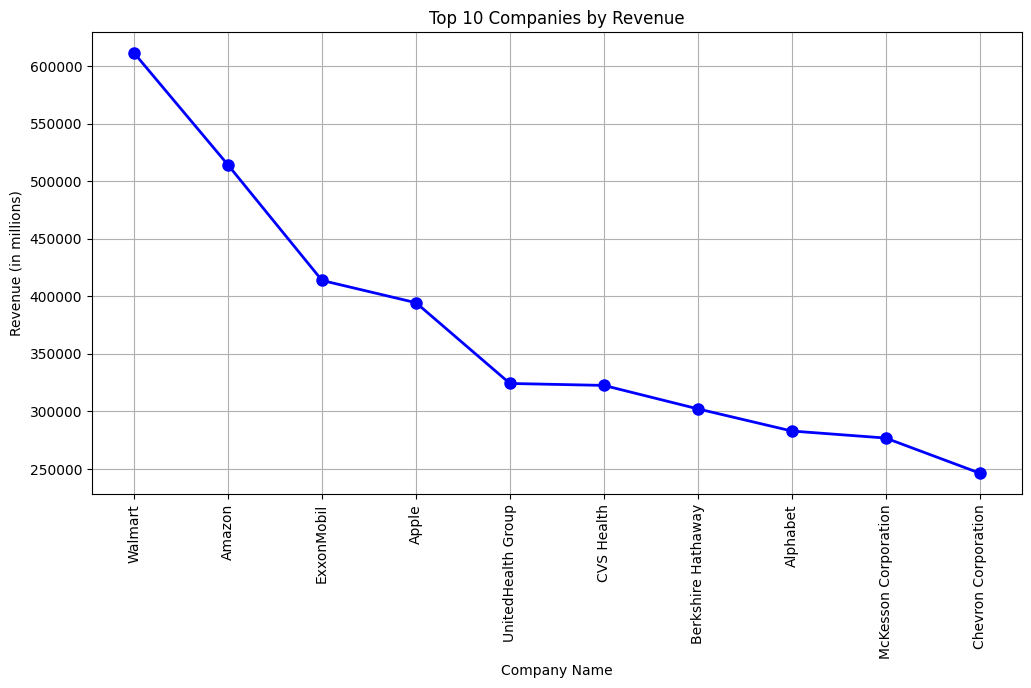

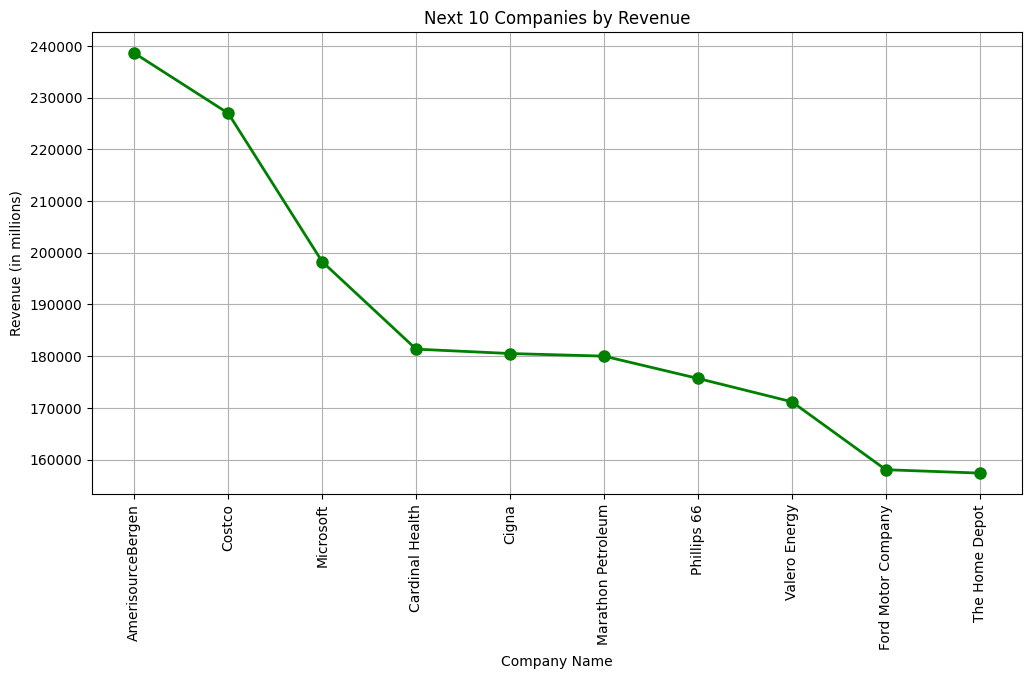

In [116]:
cd['Revenue (USD millions)'] = cd['Revenue (USD millions)'].astype(
    str).str.replace(',', '')


cd['Revenue (USD millions)'] = pd.to_numeric(
    cd['Revenue (USD millions)'], errors='coerce')

cd['Revenue (USD millions)'] = cd['Revenue (USD millions)'].fillna(0)
cd['Employees'] = cd['Employees'].astype(str).str.replace(',', '')
cd['Employees'] = pd.to_numeric(cd['Employees'], errors='coerce')
cd['Employees'] = cd['Employees'].fillna(0)


top_10_companies = cd[:10]
next_10_companies = cd[10:20]


plt.figure(figsize=(12, 6))
plt.plot(
    top_10_companies['Name'],
    top_10_companies['Revenue (USD millions)'],
    marker='o',
    color='b',
    linewidth=2,
    markersize=8,
)
plt.xlabel('Company Name')
plt.ylabel('Revenue (in millions)')
plt.title('Top 10 Companies by Revenue')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(
    next_10_companies['Name'],
    next_10_companies['Revenue (USD millions)'],
    marker='o',
    color='g',
    linewidth=2,
    markersize=8,
)
plt.xlabel('Company Name')
plt.ylabel('Revenue (in millions)')
plt.title('Next 10 Companies by Revenue')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

## This code performs Web Scraping to Extract Information about the Largest Companies in the United States by Revenue from a Wikipedia page.
This code creates a DataFrame (cd) to store the data and performs data cleaning and preprocessing. The preprocessed data is split into training and testing sets, and categorical variables are encoded using Label Encoding. The code trains a machine learning model (Random Forest Regressor) on the training set and evaluates its performance on the test set using Mean Absolute Error. Finally, it demonstrates making a revenue prediction on new data using the trained model.

In [117]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')

table = soup.find('table', class_='wikitable')

table_headers = table.find_all('th')
column_titles = [header.text.strip() for header in table_headers]

cd = pd.DataFrame(columns=column_titles)

table_rows = table.find_all('tr')[1:]  # Exclude header row
for row in table_rows:
    row_data = row.find_all(['td', 'th'])
    individual_row_data = [data.text.strip() for data in row_data]

    
    if len(individual_row_data) == len(cd.columns):
        cd.loc[len(cd)] = individual_row_data


cd['Revenue (USD millions)'] = pd.to_numeric(cd['Revenue (USD millions)'].astype(str).str.replace(',', ''), errors='coerce', downcast='float')
cd['Revenue growth'] = pd.to_numeric(cd['Revenue growth'].str.rstrip('%'), errors='coerce', downcast='float')
cd['Employees'] = pd.to_numeric(cd['Employees'].str.replace(',', ''), errors='coerce')
cd = cd.dropna(subset=['Revenue (USD millions)'])


features = ['Revenue growth', 'Employees', 'Industry', 'Headquarters']
target = 'Revenue (USD millions)'

train_data, test_data = train_test_split(cd, test_size=0.2, random_state=42)

le_industry = LabelEncoder()
le_headquarters = LabelEncoder()

le_industry.fit(cd['Industry'])
le_headquarters.fit(cd['Headquarters'])

train_data['Industry'] = le_industry.transform(train_data['Industry'])
train_data['Headquarters'] = le_headquarters.transform(train_data['Headquarters'])

test_data['Industry'] = le_industry.transform(test_data['Industry'])
test_data['Headquarters'] = le_headquarters.transform(test_data['Headquarters'])

model = RandomForestRegressor(random_state=42)
model.fit(train_data[features], train_data[target])

predictions = model.predict(test_data[features])

mae = mean_absolute_error(test_data[target], predictions)
print(f'Mean Absolute Error: {mae}')

new_data = pd.DataFrame({
    'Revenue growth': [0.15],
    'Employees': [100000],
    'Industry': ['Technology'],
    'Headquarters': ['San Francisco, California']
})

new_data['Industry'] = le_industry.transform(new_data['Industry'])
new_data['Headquarters'] = le_headquarters.transform(new_data['Headquarters'])

new_prediction = model.predict(new_data[features])
print(f'Predicted Revenue for the new data: {new_prediction[0]} million USD')


Mean Absolute Error: 62089.56949999998
Predicted Revenue for the new data: 90361.63 million USD


## This Code Performs Data Preprocessing and Trains a Random Forest Regression Model to Predict Revenue.

In [118]:

cd['Revenue (USD millions)'] = pd.to_numeric(cd['Revenue (USD millions)'].astype(str).str.replace(',', ''), errors='coerce', downcast='float')
cd['Revenue growth'] = pd.to_numeric(cd['Revenue growth'].astype(str).str.rstrip('%'), errors='coerce', downcast='float') / 100.0


if cd['Employees'].dtype == 'O':
    cd['Employees'] = pd.to_numeric(cd['Employees'].str.replace(',', ''), errors='coerce')

cd = cd.dropna(subset=['Revenue (USD millions)'])

le = LabelEncoder()
cd['Industry'] = le.fit_transform(cd['Industry'])
cd['Headquarters'] = le.fit_transform(cd['Headquarters'])

X = cd.drop(['Rank', 'Name', 'Revenue (USD millions)'], axis=1)
y = cd['Revenue (USD millions)']

if X.shape[0] > 0:
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
else:
    print("No valid data for training. Check your data preprocessing.")

Mean Squared Error: 8602673007.525295


## This Code Generates Two Plots to Assess the Performance of the Regression Model:

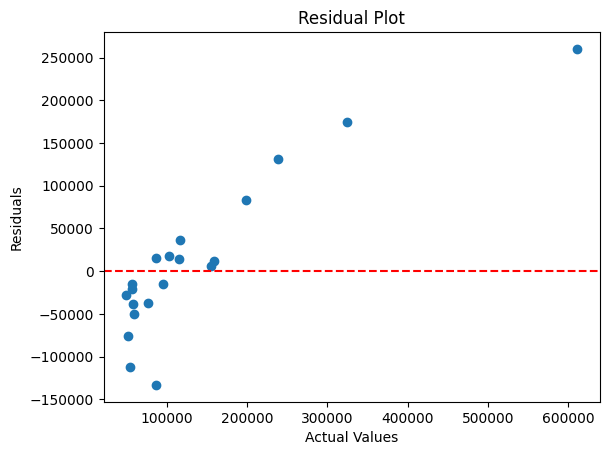

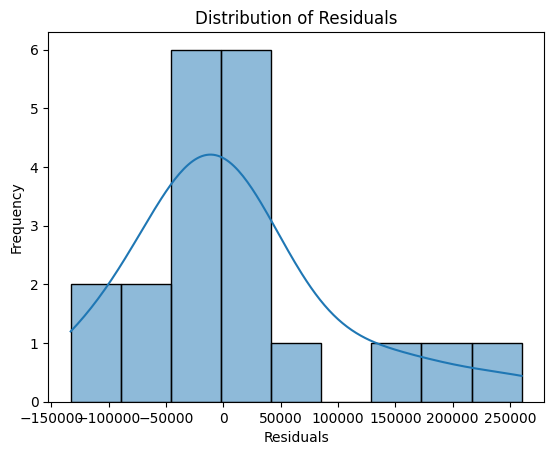

In [115]:

residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()
